In [39]:
import numpy as np

In [40]:
#condiciones iniciales
x0_1=0
y0_1=0.7
x0_2=0
y0_2=-0.7

v0x_1=0.1
v0y_1=0
v0x_2=-0.1
v0y_2=0

#arreglo que contenga las condiciones iniciales
u0 = np.array([x0_1,v0x_1,y0_1,v0y_1,x0_2,v0x_2,y0_2,v0y_2])

#parametros del sistema resorte
w = 1
l0 = 1

#arreglo que contenga el tiempo con un deltat (h)
tstop = 20
h = 1/100
t=np.arange(0.,tstop+h,h)

In [41]:
#funcion que contiene las fuerzas del resorte
def resorte(u,t,w,l0):
    #l es la longitud del resorte en un t
    l=np.sqrt((u[4]-u[0])**2+(u[6]-u[2])**2)
    deriv = np.array([u[1],(w**2)*(l-l0)*(u[4]-u[0])/l,u[3],(w**2)*(l-l0)*(u[6]-u[2])/l,u[5],-(w**2)*(l-l0)*(u[4]-u[0])/l,u[7],-(w**2)*(l-l0)*(u[6]-u[2])/l])
    return deriv

In [42]:
#nuestro método de solución de la ODE será el metódo de Runge-Kutta de cuarto orden
def runge_kutta_4to(f_user, u0, t, *args):

    n = t.size
    neq = u0.size
    u = np.zeros((n, neq))

    u[0] = u0
    
    dt = t[1]-t[0]
    
    for i in range(n-1):
        k1 = f_user(u[i], t[i],*args)
        k2 = f_user(u[i]+(1/2)*k1*dt, t[i+1]+ (1/2)*dt,*args )
        k3 = f_user(u[i]+(1/2)*k2*dt, t[i+1]+ (1/2)*dt,*args )
        k4 = f_user(u[i]+ k3*dt, t[i+1]+ dt,*args)
        u[i+1] = u[i] + (1/6)*dt*(k1+2*k2+2*k3+k4)
    return u

In [43]:
#Función que calcula la energía mecánica del sistema dado el arreglo de coordenadas y velocidades
def Emec(u,w,l0):
    l=np.sqrt((u[:,4]-u[:,0])**2+(u[:,6]-u[:,2])**2)
    r1=(u[:,1]**2+u[:,3]**2)
    r2=(u[:,5]**2+u[:,7]**2)
    K=(1/2)*r1+(1/2)*r2
    U=(1/2)*(w)*((l-l0)**2)
    E=K+U
    return E,K,U

In [44]:
u = runge_kutta_4to(resorte,u0,t,w,l0)
x1 = u[:,0]
x2 = u[:,4]
y1 = u[:,2]
y2 = u[:,6]

#Cambio a polares
angulo= np.arctan((y2-y1)/(x2-x1))
r= np.sqrt((x2-x1)**2+(y2-y1)**2)

E1,K,U = Emec(u,w,l0)

/var/folders/jb/60_98sg10y12km6nlm43yctc0000gn/T/ipykernel_52830/4123614687.py:8: RuntimeWarning: divide by zero encountered in true_divide
  angulo= np.arctan((y2-y1)/(x2-x1))


In [45]:
#función que calcula la velocidad en el punto medio dados los arreglos de las coordenadas y el tiempo
def Vcm(x1,x2,y1,y2,t):
    n=t.size
    Deltat=np.zeros((n,1))
    Vxcm=np.zeros((n,1))
    Vycm=np.zeros((n,1))
    xcm = (x2+x1)/2
    ycm = (y2+y1)/2
    for i in range(n-1):
        Deltat[i] = t[i+1]-t[i]
        Vxcm[i] = xcm[i]/Deltat[i]
        Vycm[i] = ycm[i]/Deltat[i]
    return Vxcm,Vycm,xcm,ycm

In [46]:
def momento_angular(u):
    r = (u[:,0]-u[:,4],u[:,2]-u[:,6])
    V = (u[:,1]-u[:,5],u[:,3]-u[:,7])   
    momento_angular = np.cross(r,V,axis=0)
    return momento_angular

L=momento_angular(u)

In [47]:

L = momento_angular(u)


In [48]:
Velcmx, Velcmy, xcm, ycm = Vcm(x1,x2,y1,y2,t)

In [49]:
import matplotlib.pyplot as plt

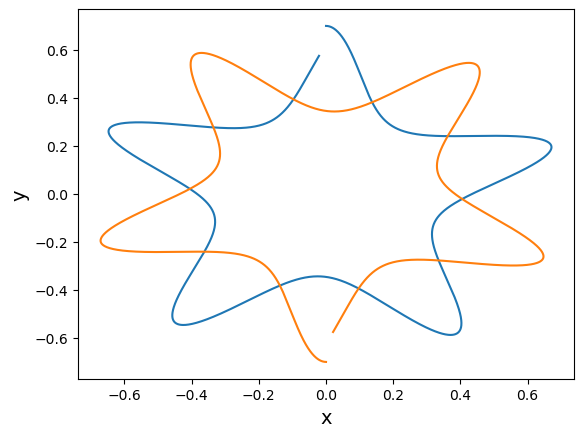

In [50]:
plt.plot(x1,y1, label = "partícula 1")
plt.plot(x2,y2, label = "partícula 2")
plt.xlabel('x',fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

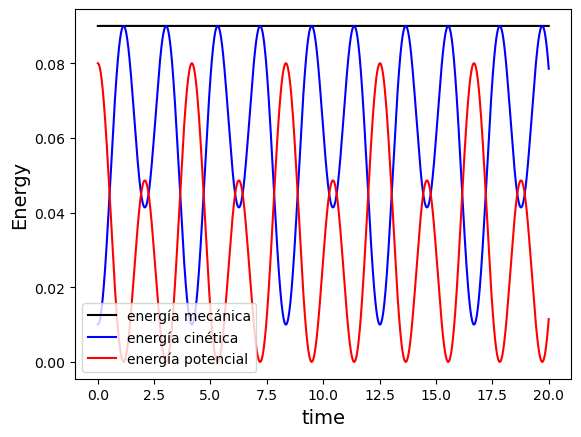

In [51]:
plt.plot(t,E1, color ='black', label = "energía mecánica")
plt.plot(t,K,  color='blue',label = "energía cinética")
plt.plot(t,U,  color='red',label = "energía potencial")

plt.xlabel('time',fontsize=14)
plt.ylabel('Energy', fontsize=14)


plt.legend(loc = 'best')
plt.show()

Cmo se 

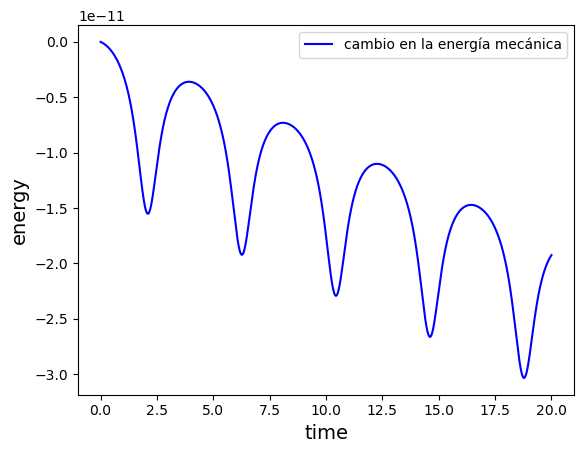

In [52]:
plt.plot(t,E1-E1[0], color='blue', label= 'cambio en la energía mecánica')

plt.xlabel('time', fontsize=14)
plt.ylabel('energy', fontsize=14)
plt.legend(loc = 'best')
plt.show()

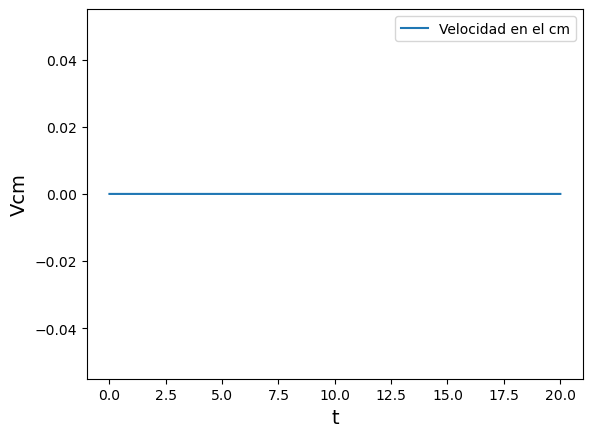

In [53]:
plt.plot(t,np.sqrt(Velcmx**2+Velcmy**2), label = "Velocidad en el cm")
plt.xlabel('t',fontsize=14)
plt.ylabel('Vcm', fontsize=14)
plt.legend(loc = 'best')
plt.show()


In [54]:
L[0]

-0.27999999999999997

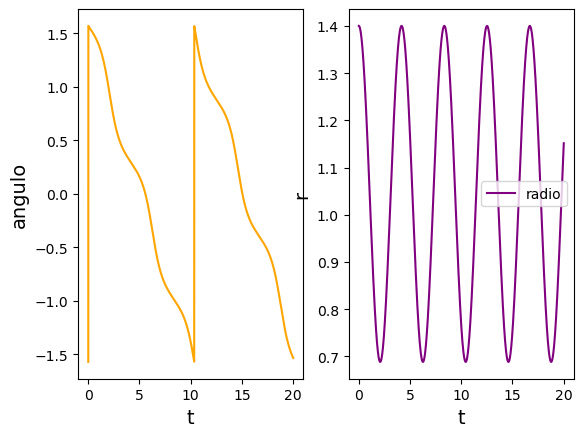

In [55]:

plt.subplot(1,2,1)
plt.plot(t,angulo, color='orange',label = "ángulo")
plt.xlabel('t',fontsize=14)
plt.ylabel('angulo', fontsize=14)
plt.subplot(1,2,2)
plt.plot(t,r, color='purple',label = "radio")
plt.xlabel('t',fontsize=14)
plt.ylabel('r', fontsize=14)
plt.legend(loc = 'best')
plt.show()

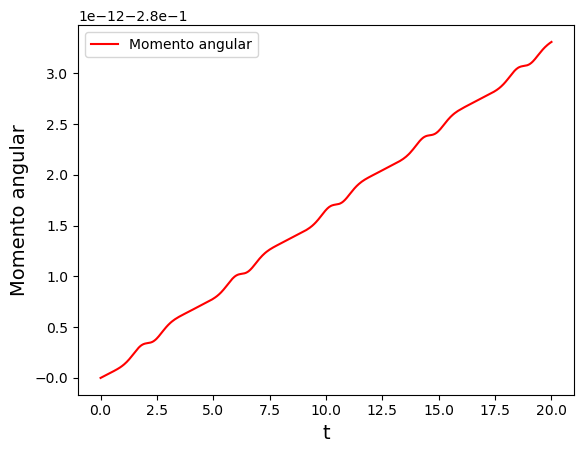

In [56]:
plt.plot(t,L,color='red',label = "Momento angular")
plt.xlabel('t',fontsize=14)
plt.ylabel('Momento angular', fontsize=14)
plt.legend(loc = 'best')
plt.show()

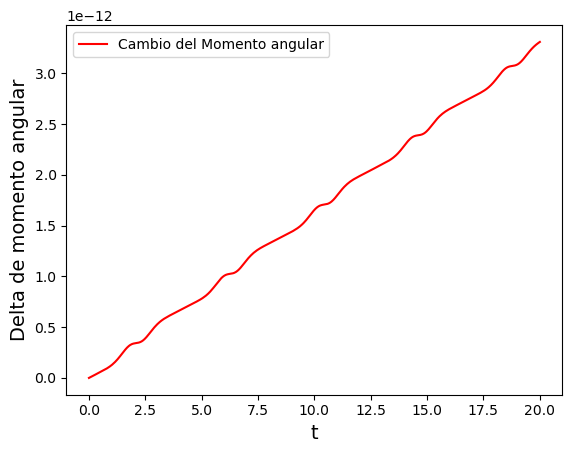

In [57]:
plt.plot(t,L-L[0],color='red',label = "Cambio del Momento angular")
plt.xlabel('t',fontsize=14)
plt.ylabel('Delta de momento angular', fontsize=14)
plt.legend(loc = 'best')
plt.show()